In [26]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("Update.csv")

In [3]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Aug-23,EQ,"2,472.00","2,484.00","2,431.10","2,468.35","2,436.95","2,443.75","2,465.38","2,630.95","2,431.10","6,290,413","15,508,240,986.20","248,985"
1,25-Aug-23,EQ,"2,456.00","2,505.00","2,442.60","2,479.80","2,461.90","2,468.35","2,475.31","2,630.95","2,442.60","11,111,200","27,503,665,768.50","309,987"
2,24-Aug-23,EQ,"2,539.90","2,539.90","2,471.00","2,522.20","2,475.80","2,479.80","2,505.26","2,630.95","2,458.05","7,070,010","17,712,228,152.35","277,360"
3,23-Aug-23,EQ,"2,524.20","2,542.85","2,516.95","2,519.40","2,518.20","2,522.20","2,528.38","2,630.95","2,458.05","4,758,976","12,032,500,977.45","186,890"
4,22-Aug-23,EQ,"2,516.90","2,537.95","2,499.00","2,520.00","2,523.00","2,519.40","2,522.49","2,630.95","2,458.05","3,856,522","9,728,035,039.30","234,127"


In [4]:
df.columns= df.columns.str.strip()

In [5]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%b-%y')
df= df.sort_values(by='Date',ascending=True)
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
247,2022-08-29,EQ,"2,585.00","2,655.00","2,578.05","2,618.00","2,600.00","2,597.65","2,614.34","2,856.15","2,180.00","9,155,684","23,936,068,091.80","326,003"
246,2022-08-30,EQ,"2,614.00","2,645.25","2,576.60","2,597.65","2,642.00","2,637.95","2,614.74","2,856.15","2,180.00","10,678,670","27,921,981,356.70","285,656"
245,2022-09-01,EQ,"2,582.65","2,604.95","2,550.70","2,637.95","2,564.00","2,560.40","2,580.13","2,856.15","2,180.00","9,188,434","23,707,362,824.55","346,414"
244,2022-09-02,EQ,"2,560.40","2,575.35","2,525.70","2,560.40","2,527.95","2,530.50","2,546.24","2,856.15","2,180.00","5,999,196","15,275,378,547.55","266,158"
243,2022-09-05,EQ,"2,531.00","2,581.50","2,531.00","2,530.50","2,567.15","2,569.80","2,563.92","2,856.15","2,180.00","5,227,785","13,403,622,183.40","189,614"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-08-22,EQ,"2,516.90","2,537.95","2,499.00","2,520.00","2,523.00","2,519.40","2,522.49","2,630.95","2,458.05","3,856,522","9,728,035,039.30","234,127"
3,2023-08-23,EQ,"2,524.20","2,542.85","2,516.95","2,519.40","2,518.20","2,522.20","2,528.38","2,630.95","2,458.05","4,758,976","12,032,500,977.45","186,890"
2,2023-08-24,EQ,"2,539.90","2,539.90","2,471.00","2,522.20","2,475.80","2,479.80","2,505.26","2,630.95","2,458.05","7,070,010","17,712,228,152.35","277,360"
1,2023-08-25,EQ,"2,456.00","2,505.00","2,442.60","2,479.80","2,461.90","2,468.35","2,475.31","2,630.95","2,442.60","11,111,200","27,503,665,768.50","309,987"


In [7]:
numeric_columns = ['OPEN', 'HIGH', 'LOW', 'close', 'VOLUME']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '').astype(float)

In [8]:
df['Next_Open'] = df['OPEN'].shift(-1)
df.dropna(inplace=True)

In [9]:
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,Next_Open
247,2022-08-29,EQ,2585.00,2655.00,2578.05,"2,618.00","2,600.00",2597.65,"2,614.34","2,856.15","2,180.00",9155684.0,"23,936,068,091.80","326,003",2614.00
246,2022-08-30,EQ,2614.00,2645.25,2576.60,"2,597.65","2,642.00",2637.95,"2,614.74","2,856.15","2,180.00",10678670.0,"27,921,981,356.70","285,656",2582.65
245,2022-09-01,EQ,2582.65,2604.95,2550.70,"2,637.95","2,564.00",2560.40,"2,580.13","2,856.15","2,180.00",9188434.0,"23,707,362,824.55","346,414",2560.40
244,2022-09-02,EQ,2560.40,2575.35,2525.70,"2,560.40","2,527.95",2530.50,"2,546.24","2,856.15","2,180.00",5999196.0,"15,275,378,547.55","266,158",2531.00
243,2022-09-05,EQ,2531.00,2581.50,2531.00,"2,530.50","2,567.15",2569.80,"2,563.92","2,856.15","2,180.00",5227785.0,"13,403,622,183.40","189,614",2573.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2023-08-21,EQ,2539.95,2555.45,2515.65,"2,556.80","2,519.50",2520.00,"2,528.76","2,630.95","2,458.05",4610873.0,"11,659,793,136.25","186,604",2516.90
4,2023-08-22,EQ,2516.90,2537.95,2499.00,"2,520.00","2,523.00",2519.40,"2,522.49","2,630.95","2,458.05",3856522.0,"9,728,035,039.30","234,127",2524.20
3,2023-08-23,EQ,2524.20,2542.85,2516.95,"2,519.40","2,518.20",2522.20,"2,528.38","2,630.95","2,458.05",4758976.0,"12,032,500,977.45","186,890",2539.90
2,2023-08-24,EQ,2539.90,2539.90,2471.00,"2,522.20","2,475.80",2479.80,"2,505.26","2,630.95","2,458.05",7070010.0,"17,712,228,152.35","277,360",2456.00


In [12]:
train_input = np.array(df.OPEN[0:200]).reshape(200,1)
train_output = np.array(df.close[0:200]).reshape(200,1)

test_input = np.array(df.OPEN[200:247]).reshape(47,1)
test_output = np.array(df.close[200:247]).reshape(47,1)

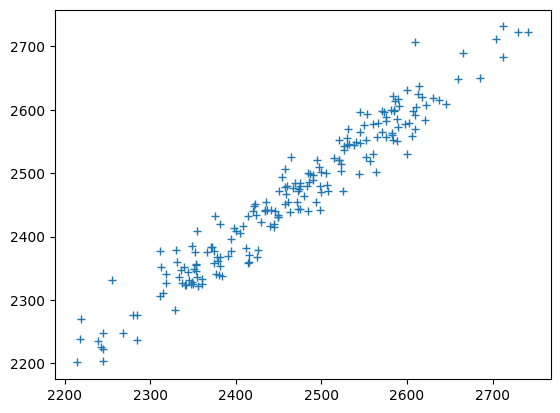

In [15]:
plt.plot(train_input, train_output, '+')

In [16]:
ref=linear_model.LinearRegression()
ref.fit(train_input,train_output)

LinearRegression()

In [22]:
test_predictions=ref.predict(test_input)

In [32]:
test_predictions

array([[2543.91407372],
       [2553.24923781],
       [2552.26138976],
       [2525.49070755],
       [2503.85683522],
       [2493.53382307],
       [2509.78392353],
       [2542.77804846],
       [2554.28647826],
       [2620.42290534],
       [2604.61733651],
       [2572.0677432 ],
       [2630.30138586],
       [2683.54639585],
       [2746.76867117],
       [2760.00583507],
       [2777.39196078],
       [2743.90391182],
       [2740.94036767],
       [2810.0897313 ],
       [2822.93175597],
       [2575.969743  ],
       [2604.61733651],
       [2478.17278587],
       [2491.01481054],
       [2482.12417808],
       [2530.57812502],
       [2508.84546788],
       [2524.4534671 ],
       [2551.27354171],
       [2506.03010093],
       [2472.54205197],
       [2495.75648119],
       [2517.68670794],
       [2524.60164431],
       [2501.73296191],
       [2521.58870775],
       [2528.99756814],
       [2535.46797288],
       [2547.3221495 ],
       [2563.22650313],
       [2527.812

In [36]:
ref.predict([[2452]])

array([[2449.52519236]])

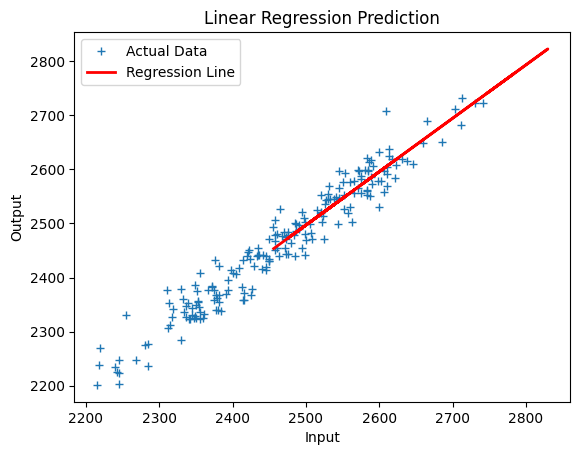

In [27]:
plt.plot(train_input, train_output, '+',label='Actual Data')
plt.plot(test_input, test_predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

In [28]:
mse = mean_squared_error(test_output, test_predictions)
r2 = r2_score(test_output, test_predictions)

In [31]:
print("Mean Square vaue",mse)
print("R square",r2)

Mean Square vaue 848.466813428274
R square 0.9138786632629968


In [33]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(go.Candlestick(x=df.index,
                              open=df['OPEN'],
                              high=df['HIGH'],
                              low=df['LOW'],
                              close=df['close'],
                             ))


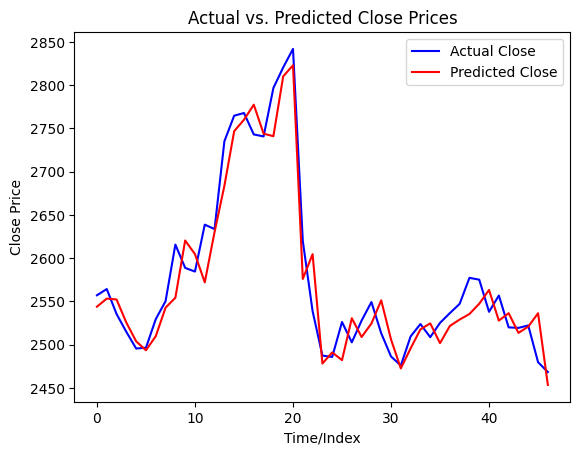

In [38]:
time_values = np.arange(len(test_output))

plt.plot(time_values, test_output, label='Actual Close', color='blue')
plt.plot(time_values, test_predictions, label='Predicted Close', color='red')
plt.xlabel('Time/Index')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()
plt.show()